ref: https://www.cnblogs.com/chuxiuhong/p/5885073.html

In [5]:
# 正则表达式
import re

key = r"<html><body><h1>hello world<h1></body></html>"#这段是你要匹配的文本
p1 = r"(?<=<h1>).+?(?=<h1>)"#这是我们写的正则表达式规则，你现在可以不理解啥意思
pattern1 = re.compile(p1)#我们在编译这段正则表达式
matcher1 = re.search(pattern1,key)#在源文本中搜索符合正则表达式的部分
print (matcher1.group(0))#打印出来

hello world


In [ ]:
import re

key = r"javapythonhtmlvhdl"#这是源文本
p1 = r"python"#这是我们写的正则表达式
pattern1 = re.compile(p1)#同样是编译
matcher1 = re.search(pattern1,key)#同样是查询
print (matcher1.group(0))

In [7]:
import re

key = r"<h1>hello world<h1>"#源文本
p1 = r"<h1>.+<h1>"#我们写的正则表达式，下面会将为什么
pattern1 = re.compile(p1)
print (pattern1.findall(key))#发没发现，我怎么写成findall了？咋变了呢？

['<h1>hello world<h1>']


有了入门级的经验，我们知道那两个'< h1 >'就是普普通通的字符，但是中间的是什么鬼？
'.'字符在正则表达式代表着可以代表任何一个字符（包括它本身）
findall返回的是所有符合要求的元素列表，包括仅有一个元素时，它还是给你返回的列表。

机智如你可能会突然问：那我如果就只是想匹配"."呢？结果啥都给我返回了咋整？在正则表达式中有一个字符\，其实如果你编程经验较多的话，你就会发现这是好多地方的“转义符”。在正则表达式里，这个符号通常用来把特殊的符号转成普通的，把普通的转成特殊的23333（并不是特殊的“2333”，写完才发现会不会有脑洞大的想歪了）。
举个栗子，你真的想匹配"chuxiuhong@hit.edu.cn"这个邮箱（我的邮箱），你可以把正则表达式写成下面这个样子：

In [10]:
import re

key = r"afiouwehrfuichuxiuhong@hit.edu.cnaskdjhfiosueh"
p1 = r"chuxiuhong@hit\.edu\.cn"
pattern1 = re.compile(p1)
print (pattern1.findall(key))

['chuxiuhong@hit.edu.cn']


发现了吧，我们在.的前面加上了转义符\，但是并不是代表匹配“\.”的意思，而是只匹配“.”的意思！
不知道你细不细心，有没有发现我们第一次用.时，后面还跟了一个+？那这个加号是干什么的呢？
其实不难想，我们说了“.字符在正则表达式代表着可以代表任何一个字符（包括它本身）”，但是"hello world"可不是一个字符啊。
+的作用是将前面一个字符或一个子表达式重复一遍或者多遍。
比方说表达式“ab+”那么它能匹配到“abbbbb”，但是不能匹配到"a"，它要求你必须得有个b，多了不限，少了不行。你如果问我有没有那种“有没有都行，有多少都行的表达方式”，回答是有的。
*跟在其他符号后面表达可以匹配到它0次或多次
比方说我们在网页内遇到了链接，可能既有http://开头的，又有https://开头的，我们怎么处理？

In [19]:
import re

key = r"ababababababbbbbcbbba"
p1 = r"ab+"
pattern1 = re.compile(p1)
print (pattern1.findall(key)) # 表示可以匹配多个ab，b可以有大于等于0个

['ab', 'ab', 'ab', 'ab', 'ab', 'abbbbb']


In [11]:
import re

key = r"http://www.nsfbuhwe.com and https://www.auhfisna.com"#胡编乱造的网址，别在意
p1 = r"https*://"#看那个星号！
pattern1 = re.compile(p1)
print (pattern1.findall(key))

['http://', 'https://']


2.比方说我们有这么一个字符串"cat hat mat qat"，你会发现前面三个是实际的单词，最后那个是我胡编乱造的（上百度查完是昆士兰英语学院的缩写= =）。如果你本来就知道"at"前面是c、h、m其中之一时这才构成单词，你想把这样的匹配出来。根据已经学到的知识是不是会想到写出来三个正则表达式进行匹配？实际上不需要。因为有一种多字符匹方式
[]代表匹配里面的字符中的任意一个
还是举个栗子，我们发现啊，有的程序员比较过分，，在<html></html>这对标签上，大小写混用，老害得我们抓不到想要的东西，我们该怎么应对？是写16*16种正则表达式挨个匹配？no

In [22]:
import re

key = r"lalala<hTml>hello</Html>heiheihei"
p1 = r"<[Hh][Tt][Mm][Ll]>.+?</[Hh][Tt][Mm][Ll]>"
pattern1 = re.compile(p1)
print (pattern1.findall(key))
print(re.findall(p1,key))

['<hTml>hello</Html>']
['<hTml>hello</Html>']


我们既然有了范围性的匹配，自然有范围性的排除。
[^]代表除了内部包含的字符以外都能匹配
还是cat,hat,mat,qat这个例子，我们想匹配除了qat以外的，那么就应该这么写：

In [23]:
import re

key = r"mat cat hat pat"
p1 = r"[^p]at"#这代表除了p以外都匹配
pattern1 = re.compile(p1)
print (pattern1.findall(key))

['mat', 'cat', 'hat']


为了方便我们写简洁的正则表达式，它本身还提供下面这样的写法

- 正则表达式	代表的匹配字符
- [0-9]	0123456789任意之一
- [a-z]	小写字母任意之一
- [A-Z]	大写字母任意之一
- \d	等同于[0-9]
- \D	等同于[^0-9]匹配非数字
- \w	等同于[a-z0-9A-Z_]匹配大小写字母、数字和下划线
- \W	等同于[^a-z0-9A-Z_]等同于上一条取非

3.介绍到这里，我们可能已经掌握了大致的正则表达式的构造方式，但是我们常常会在实战中遇到一些匹配的不准确的问题。比方说：

In [25]:
import re

key = r"chuxiuhong@hit.edu.cn"
p1 = r"@.+\."# 这里表示@之后的所有字符一直到最后一个.
pattern1 = re.compile(p1)
print (pattern1.findall(key))

['@hit.edu.']


这是因为正则表达式默认是“贪婪”的，我们之前讲过，“+”代表是字符重复一次或多次。但是我们没有细说这个多次到底是多少次。所以它会尽可能“贪婪”地多给我们匹配字符，在这个例子里也就是匹配到最后一个“.”。
我们怎么解决这种问题呢？只要在“+”后面加一个“？”就好了。

In [28]:
import re

key = r"chuxiuhong@hit.edu.cn"
p1 = r"@.+?\."# 这里表示@之后所有字符一直到第一个.
pattern1 = re.compile(p1)
print (pattern1.findall(key))

['@hit.']


为了能够准确的控制重复次数，正则表达式还提供
{a,b}(代表a<=匹配次数<=b)

还是举个栗子，我们有sas,saas,saaas，我们想要sas和saas，我们怎么处理呢？

In [33]:
import re

key = r"saas and sas and saaas"
p1 = r"sa{0,2}s" # 左右都是开区间
pattern1 = re.compile(p1)
print( pattern1.findall(key))

'''
如果你省略掉{1,2}中的2，那么就代表至少匹配一次，那么就等价于？
如果你省略掉{1,2}中的1，那么就代表至多匹配2次。
'''

['saas', 'sas']


'\n如果你省略掉{1,2}中的2，那么就代表至少匹配一次，那么就等价于？\n如果你省略掉{1,2}中的1，那么就代表至多匹配2次。\n'

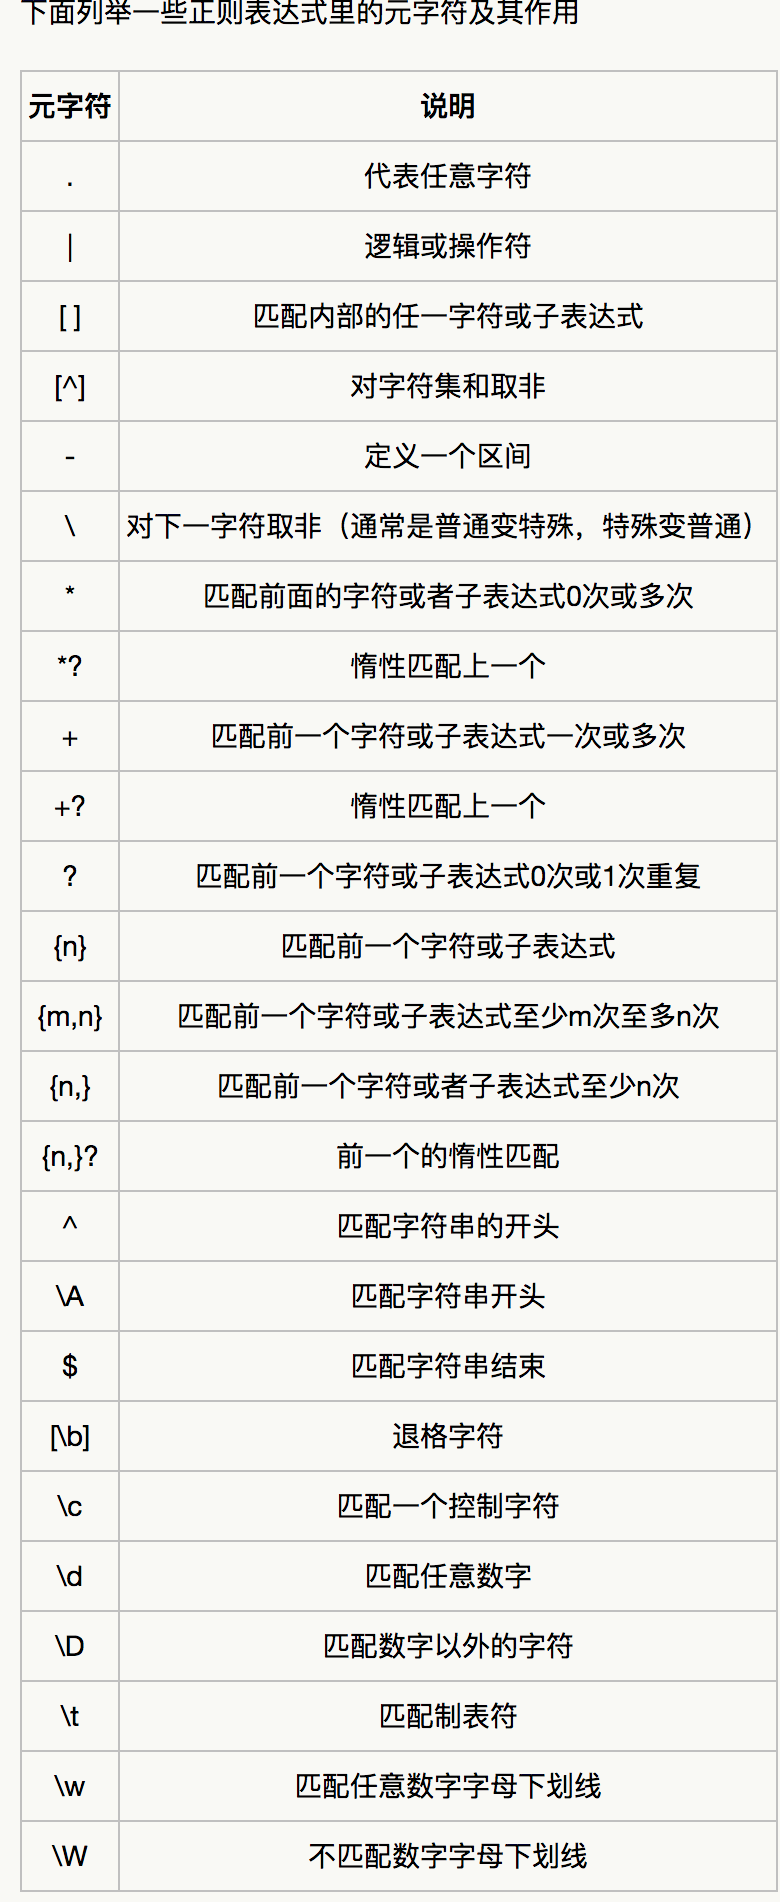